# **AI Society Week 4. Classification**

## Jupyter Notebooks and Python
For workshops, we typically use **Google Colab**, a service that allows you to run python code in a nice containerized environment. It even provides free GPU/TPU runtimes!
___

In Google Colab, you write code using **Jupyter notebooks**. Notebooks are comprised of text and code cells, which can be run by hitting `Shift + Enter`. For your convenience, here are a few more nifty keyboard shortcuts:

* `b`: New cell below
* `a`: New cell above


## Hardware Needed:
Any computer with access to the internet and web browser

* 👉🏻Link to Dataset:
https://drive.google.com/file/d/1hyklg8Kz0buC84lWa25KB73tH1eupXA7/view?usp=sharing
https://drive.google.com/file/d/1hu_9K2P0ssfiXpKYGlr5GTQg9SsGj8Qe/view?usp=sharing

# Importing the necesary libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading The Datatset

In [16]:
data = pd.read_csv('/content/drive/MyDrive/AI Society Fall23/Week 4/data_week4.csv')

In [17]:
data.head()

,Event Name,Description,Theme
0,Valentine's Paint Night!,descriptioncome take break homework paint also...,Art & Music
1,Valentine's Day Decorating,descriptionstudents decorate hall door dorm va...,Art & Music
2,Valentine Decorating with CA Taylor,descriptionjoin ca taylor decorate valentines ...,Art & Music
3,BWL's Annual Galentine Event!,descriptionhi barrett womens league bwl annual...,Art & Music
4,Writer's Guild General Meeting,descriptioncome join us workshop writing socia...,Art & Music


In [18]:
data.shape

(1413, 3)

In [19]:
data_tfidf = pd.read_csv('/content/drive/MyDrive/AI Society Fall23/Week 4/tfidf_week4.csv')

In [31]:
data_tfidf.head()

,aaberg,aamc,aapasc,aapi,abandoning,abba,abbasov,abby,abcdorschcom,abels,...,zinefest,zinemaking,zines,ziploc,zippers,zokaites,zone,zoo,zoom,zumba
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
data_tfidf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Columns: 7497 entries, aaberg to zumba
dtypes: float64(7497)
memory usage: 80.8 MB


In [21]:
data_tfidf.shape

(1413, 7497)

In [22]:
# Separate features (X) and target (y)
X = data_tfidf
y = data['Theme']

##One Hot Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

## Train Test Feature Split

In [24]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Loading the Models

In [25]:
# Create and train the SVM model
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', decision_function_shape='ovr')  # Use 'ovr' for multiclass classification
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [26]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

In [27]:
# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7279151943462897


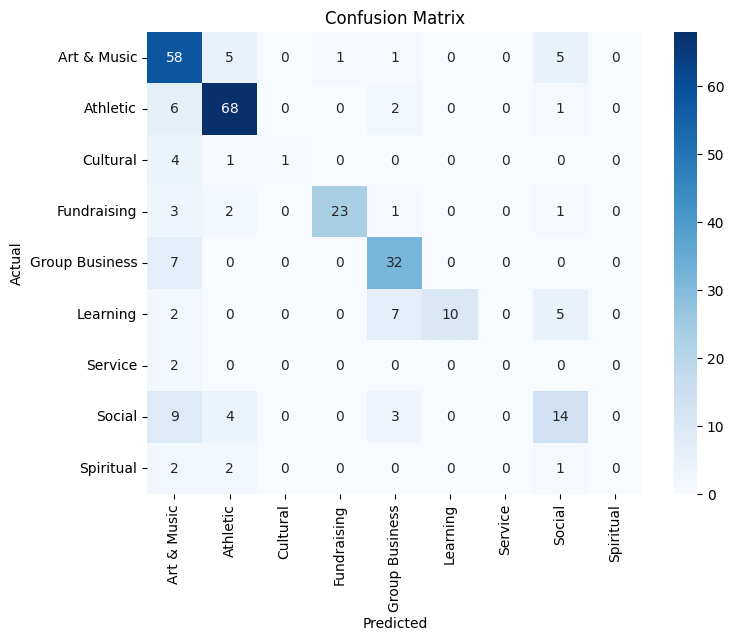

In [28]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

__________

Thanks for attending the workshop.
We will continue in next workshop.